# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Team 27, Harmony**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [48]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae


# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

<a id="two"></a>
## 2. Loading the Data

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

**Within this section:** we will load the full csv file, using the read_csv() function and pass in the full path of the file as a string.

**index column(index_col=0):** we used it specify the index


In [2]:
#load the data
df= pd.read_csv('df_train.csv',index_col=0)
df_test= pd.read_csv('df_test.csv',index_col=0)


## Basic Information of our data
**In this subsection we are trying to observe our data with few basic commands of analysis before the EDA**

The aim of this is that it will help us better understand our data in terms of structure, datatypes,total number of rows and columns

In [3]:
#first five rows
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


By running this command we can already visually see that our data has both numeric and categorical values

In [4]:
#information of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

This command has given us more insight now we know the datatypes of our data: we have Float and Object

Float64 represents the numeric data

Object represents the categorical data

we have 45 numeric values and 3 categorical values


In [5]:
#total number of columns and rows
df.shape

(8763, 48)

With in our df_train dataset we have 8763 rows and 48 columns

In [6]:
#checking for null values
df.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

with this command we are able to see the number of null values in our data

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---
**Within this section:** we want to understand patterns in our data, pinpoint any outliers and indicate relationships between variables. 

and also make use of descriptive statistics and data visualisations.


In [7]:
# look at data statistics
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


Used this command for descriptive statistics of each numerical feature:

This command will provide the mean, standard deviation and a five number summary of each numerical feature. The five number summary (Minimum, Lower Quartile (Q1) = 25%, Median (Q2) = 50%, Upper Quartile (Q3) = 75%, Maximum) 

In [8]:
df.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

Kurtosis is the measure of outliers present in the data.
 
High kurtosis (>3) indicates a large number of outliers:
Barcelona_rain_1h, Seville_rain_1h,Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h,Madrid_rain_1h, Barcelona_rain_3h,Valencia_snow_3h,Bilbao_rain_1h,Valencia_wind_speed 

Valencia_snow_3h: has the highest number of outliers

Low kurtosis (<3) a lack of outliers.

**outliers adversely affect the model’s performance especially regression-based models. So we need to observe these columns**

In [9]:
df.skew()

Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

 Skew will indicate how symmetrical your data is. 
 
 We observed positive symsetry between these features: Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Barcelona_rain_3h,Valencia_snow_3h

## Plot relevant feature interactions

<AxesSubplot:xlabel='Valencia_snow_3h'>

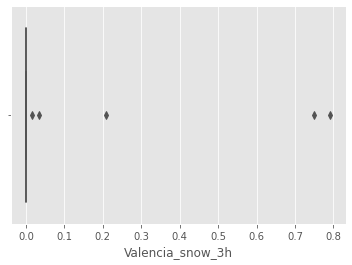

In [10]:
#cheking for outliers
plt.style.use('ggplot') 
sns.boxplot(df['Valencia_snow_3h'])

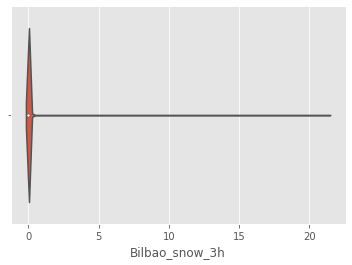

In [11]:
sns.violinplot(x='Bilbao_snow_3h', data=df);


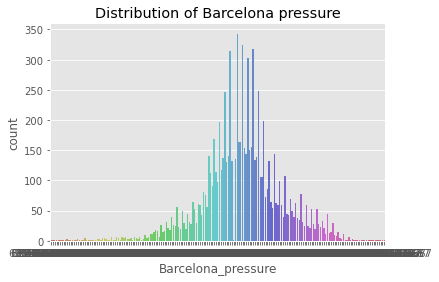

In [12]:
sns.countplot(x = 'Barcelona_pressure', data = df, palette="hls")
plt.title("Distribution of Barcelona pressure");

These visualizations help better understand the data and pick up outliers on the data.

In [13]:
# evaluate correlation
df.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,0.177393,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800
Barcelona_wind_speed,0.294640,0.069997,0.347966,-0.138625,-0.058518,0.094019,0.275317,0.136591,0.177393,1.000000,...,0.084209,0.116240,0.123403,0.120361,0.109268,0.109692,0.130367,0.089365,0.084679,-0.103633


Correlation explains how one or more variables are related to each other.
These variables can be input data features which can be used to forecast the load_shortfall_3h.

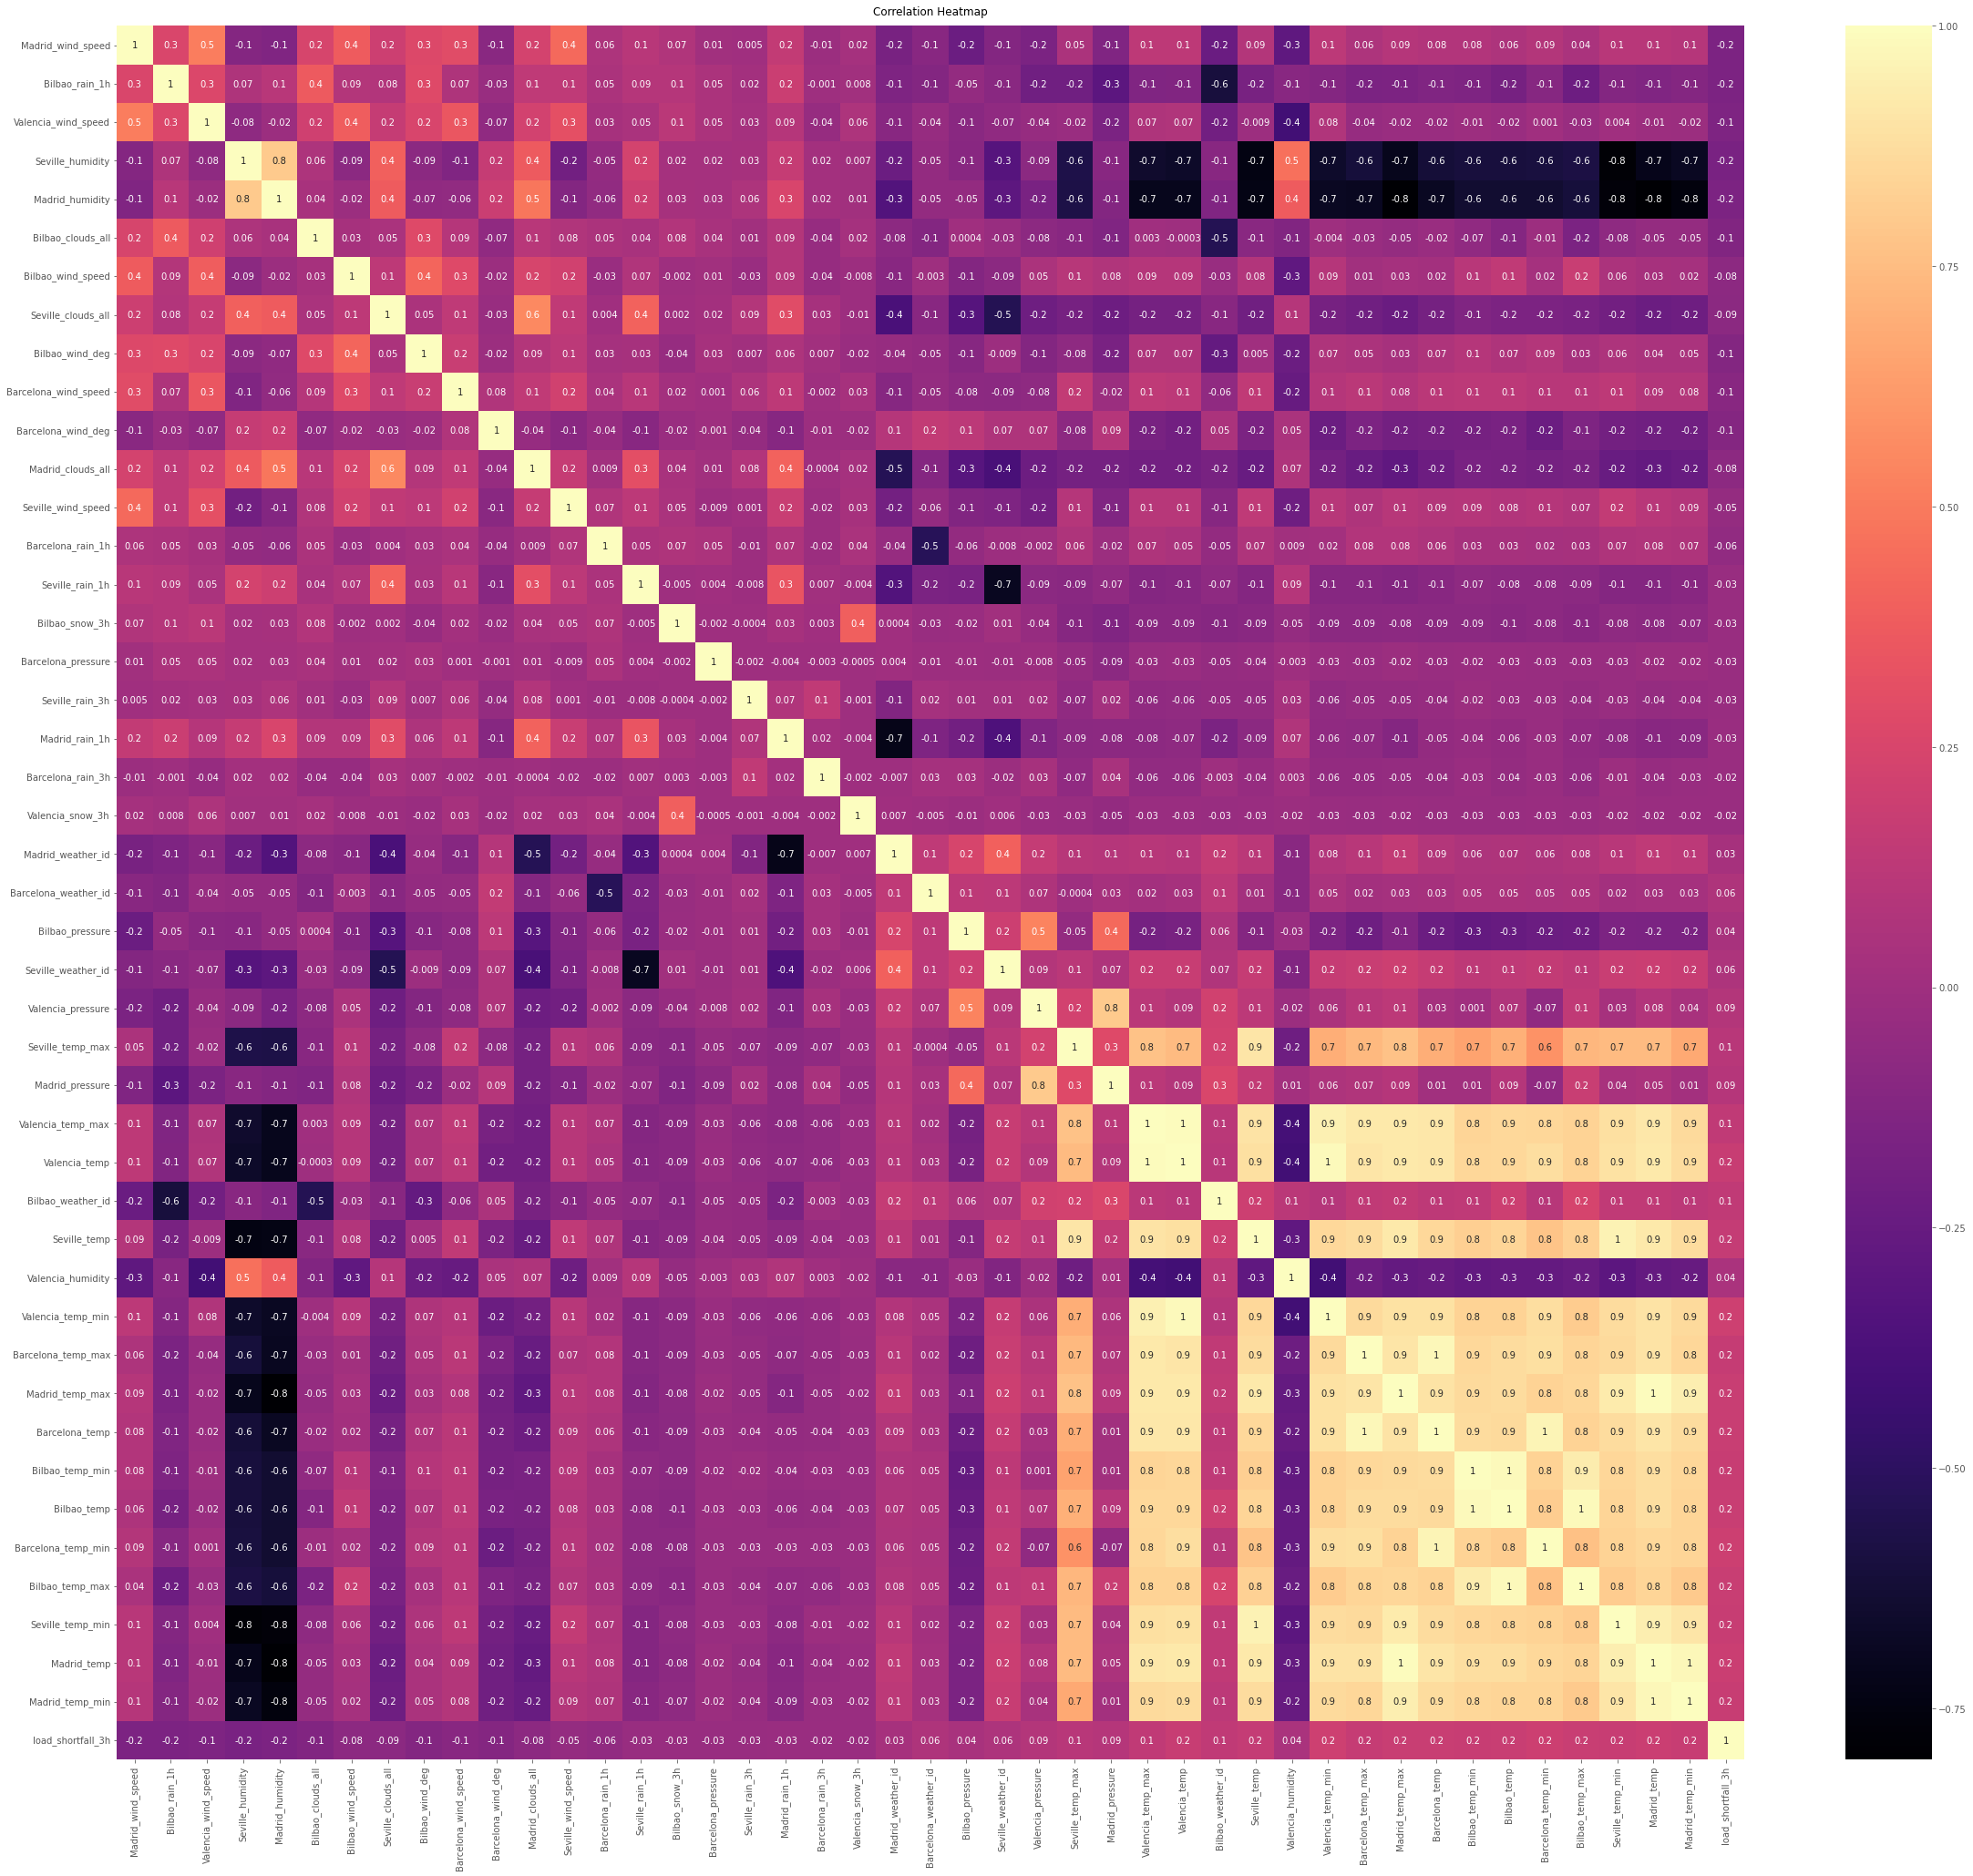

In [14]:
plt.figure(figsize=(40,35))
#sns.heatmap(corr, annot=True, cmap='magma', fmt='.1g')
heatmap = sns.heatmap(df.corr(), cmap='magma', fmt='.1g', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Have a look at feature distributions

In [15]:
#creating a list of columns with high kurtosis
wind_energy = ['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Bilbao_pressure',
       'Valencia_pressure', 'Madrid_pressure', 'Valencia_temp',
       'Seville_temp', 'Valencia_humidity', 'Barcelona_temp',
       'Bilbao_temp','Madrid_temp']

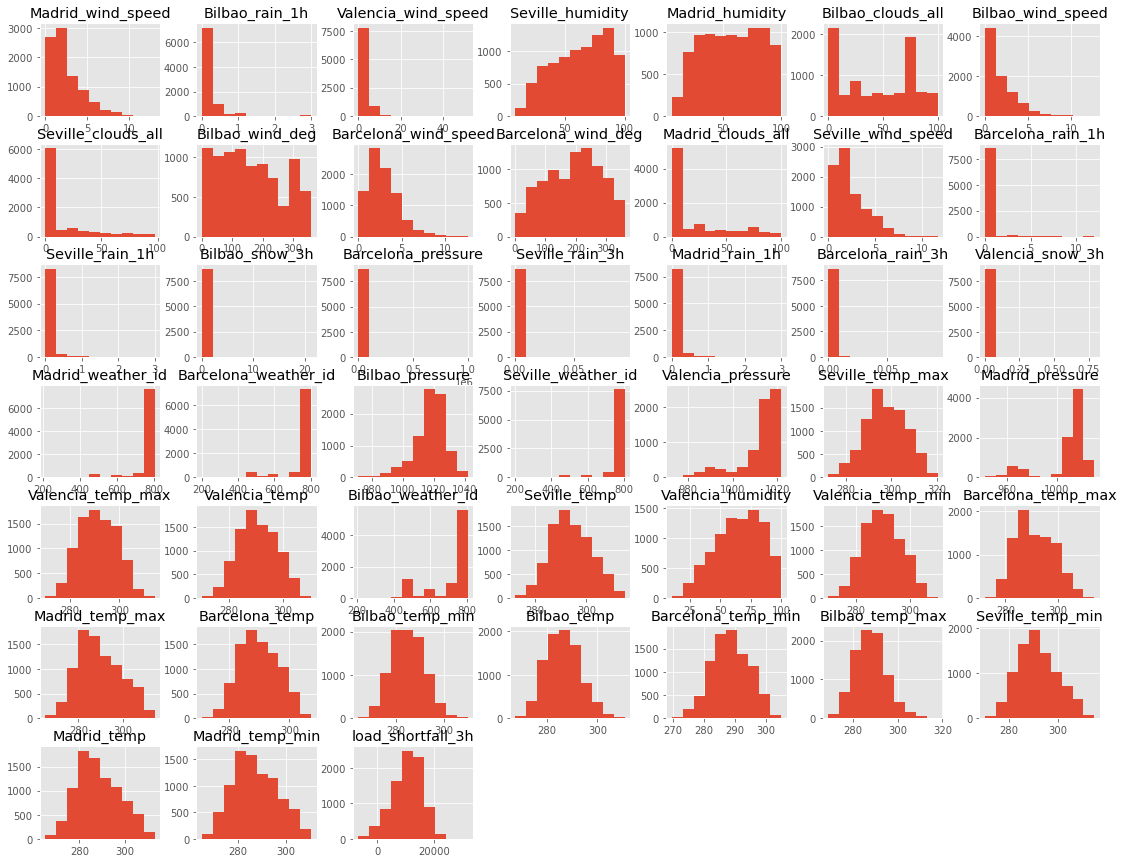

In [16]:
df.hist(figsize=(19,15));

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

## Engineering existing features

Create new fetures that will help the model better understand the input data in order for it to accuralety predict the output, the load shortfall. Breaking down the time column into year, month, day, hours and minutes will help the model explore further than just a date. If there is correlation between the electricity load shortfall and a specific hour of the day, this will be quickly discovered.

In [17]:
#creating a copy of the test dataframe
df_test1 = df_test.copy()

In [18]:
# create new features
#for df
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year   
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day       
df['hour'] = df['time'].dt.hour  

In [19]:
#for df_test
df_test1['time'] = pd.to_datetime(df_test1['time'])
df_test1['year'] = df_test1['time'].dt.year   
df_test1['month'] = df_test1['time'].dt.month
df_test1['day'] = df_test1['time'].dt.day       
df_test1['hour'] = df_test1['time'].dt.hour 

## Remove missing values/ features

Mode imputation:
There are missing values on the dataset therefore these missing values have to be replaced in order for the data to be viable.
The method used to replace missing values, in this case, will be mode imputation. Reason being that the mode is the most frequent and relevant since we are dealing with pressure.

In [20]:
#df dataframe
df['Valencia_pressure'] = df['Valencia_pressure'].fillna(df['Valencia_pressure'].mode()[0])


In [21]:
#replacing null values in df_test dataset
df_test1['Valencia_pressure'] = df_test1['Valencia_pressure'].fillna(df_test['Valencia_pressure'].mode()[0])

In [22]:
#checking for nulls
df.isnull().sum().sum()

0

## Converting the categorical to numeric for the train dataset

**instead of replacing with dummy variable we chose this method in order to extract the numeric data**

**with this method we saying go find the number and after finding the number we convert it to numeric datatype

**df_train**

In [23]:
#extracting numbers because levels are not the same so we can't use dummies
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract('(\d+)')
df['Seville_pressure'] = df['Seville_pressure'].str.extract('(\d+)')

In [24]:
#convert datatype to numeric
df['Valencia_wind_deg'] = pd.to_numeric(df['Valencia_wind_deg'])
df['Seville_pressure'] = pd.to_numeric(df['Seville_pressure'])

**df_test**: we going to peform all the procedures we did on the train dataset inorder for our dataset to match

In [25]:
#extracting numeric values 
df_test1['Seville_pressure'] = df_test1['Seville_pressure'].str.extract('(\d+)')
df_test1['Valencia_wind_deg'] = df_test1['Valencia_wind_deg'].str.extract('(\d+)')

In [26]:
#changing to numeric values
df_test1['Seville_pressure'] = pd.to_numeric(df_test1['Seville_pressure'])
df_test1['Valencia_wind_deg'] = pd.to_numeric(df_test1['Valencia_wind_deg'])

## Droping some column:

Based on our analysis we saw it fit to drop the following column:

temp_max and temp_min for all cities because the temp already provides us with information related to temperature

and all the weather id columns

In [27]:
#droping from the df_dataset
df_test1 = df_test1.drop(['time','Valencia_temp_min','Barcelona_temp_max', 'Madrid_temp_max', 'Seville_temp_max','Bilbao_temp_min','Valencia_temp_max', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min','Madrid_temp_min','Bilbao_weather_id','Seville_weather_id','Madrid_weather_id','Barcelona_weather_id'],axis=1)

In [28]:
#droping irrelevant features from train dataset
df = df.drop(['time','Valencia_temp_min','Barcelona_temp_max', 'Madrid_temp_max', 'Seville_temp_max','Bilbao_temp_min','Valencia_temp_max', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min','Madrid_temp_min','Bilbao_weather_id','Seville_weather_id','Madrid_weather_id','Barcelona_weather_id'],axis=1)

In [29]:
df_final = df.copy()

In [56]:
df_test1

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Valencia_temp,Seville_temp,Valencia_humidity,Barcelona_temp,Bilbao_temp,Madrid_temp,year,month,day,hour
8763,5.000000,8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,...,287.483333,283.673333,46.333333,287.356667,280.380000,279.866667,2018,1,1,0
8764,4.666667,8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,...,284.150000,281.673333,53.666667,284.190000,281.010000,279.193333,2018,1,1,3
8765,2.333333,7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,...,282.816667,280.613333,42.000000,283.150000,279.196667,276.340000,2018,1,1,6
8766,2.666667,7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,...,283.483333,279.936667,45.000000,283.190000,281.740000,275.953333,2018,1,1,9
8767,4.000000,7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,...,287.150000,285.570000,41.000000,286.816667,284.116667,280.686667,2018,1,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11678,0.333333,9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.000000,70.000000,...,279.323333,280.210000,69.666667,278.140000,273.210000,274.910000,2018,12,31,9
11679,0.333333,8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.000000,36.666667,...,290.323333,287.280000,32.000000,286.150000,278.443333,283.156667,2018,12,31,12
11680,1.000000,6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.000000,14.666667,...,293.483333,290.816667,23.666667,288.820000,285.073333,287.733333,2018,12,31,15
11681,1.000000,6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,0.000000,19.000000,...,285.976667,288.300000,59.000000,284.473333,281.626667,283.813333,2018,12,31,18


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [30]:
# split data 
x = df_final.drop('load_shortfall_3h', axis=1)
y = df_final['load_shortfall_3h']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3332, random_state=PARAMETER_CONSTANT)


## Random Forests model

In [31]:
# 
RF = RandomForestRegressor(n_estimators =400, max_depth=None, max_features='auto', bootstrap=True, oob_score=True,random_state =PARAMETER_CONSTANT)
RF.fit(x_train,y_train)

RandomForestRegressor(n_estimators=400, oob_score=True, random_state=42)

In [32]:
# Test the model
y_pred_train = RF.predict(x_train)
y_pred_test = RF.predict(x_test)

# Compute RMSE

print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_test)))

RMSE: 3228.233467366412


In [54]:
# option 2
RF.fit(x, y)

RandomForestRegressor(n_estimators=400, oob_score=True, random_state=42)

In [57]:
rf_pred = RF.predict(df_test1)

In [58]:
rf_pred_y = RF.predict(x)

## Decision Tree Model

In [37]:
# Build the decision tree
from sklearn.tree import DecisionTreeRegressor

In [39]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=4,random_state=PARAMETER_CONSTANT)

In [40]:
# Train the model
regr_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [61]:
#option2
regr_tree.fit(x, y)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [62]:
dt_pred_y = regr_tree.predict(x)

In [42]:
# Test the model
dt_y_pred_train = regr_tree.predict(x_train)
dt_y_pred_test = regr_tree.predict(x_test)

# Compute RMSE

print("RMSE:",np.sqrt(mean_squared_error(y_test,dt_y_pred_test)))

RMSE: 4458.834766819396


## Linear Model

In [45]:
# create model object
lm = LinearRegression()

In [46]:
#fit the model
lm.fit(x_train, y_train)

LinearRegression()

In [47]:
# Test the model
lm_y_pred_train = lm.predict(x_train)
lm_y_pred_test = lm.predict(x_test)

# Compute RMSE

print("RMSE:",np.sqrt(mean_squared_error(y_test,lm_y_pred_test)))

RMSE: 4854.547689493684
  Using cached graphviz-0.20-py3-none-any.whl (46 kB)
  Using cached plotly-5.8.0-py2.py3-none-any.whl (15.2 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [64]:
#option2
lm.fit(x, y)

LinearRegression()

In [65]:
lm_pred_y = lm.predict(x)

In [33]:

y_pred_test = RF.predict(df_test1)
final = pd.DataFrame(y_pred_test , columns=['load_shortfall_3h'])
output = pd.DataFrame({"time": df_test.copy()["time"].reset_index(drop=True)})
submission = output.join(final)
submission['load_shortfall_3h'] = final.values
submission.to_csv("final.csv", index=False)
submission


,time,load_shortfall_3h
0,2018-01-01 00:00:00,9957.000000
1,2018-01-01 03:00:00,7793.454167
2,2018-01-01 06:00:00,7572.360000
3,2018-01-01 09:00:00,9249.045000
4,2018-01-01 12:00:00,10059.974167
...,...,...
2915,2018-12-31 09:00:00,13167.695833
2916,2018-12-31 12:00:00,12916.268333
2917,2018-12-31 15:00:00,13947.456667
2918,2018-12-31 18:00:00,14436.821250


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

# Compare model performance

In [49]:
def mean_abs_err(predictions, y_test):
    # your code here
    error = mae(predictions, y_test)
    return round(error, 3)

In [59]:
# Random forest mae
mean_abs_err(rf_pred_y, y)

848.57

In [63]:
# Decision tree mae
mean_abs_err(dt_pred_y, y)

3418.581

In [67]:
# linear regression mae
mean_abs_err(lm_pred_y, y)

3797.112

## Choose best model and motivate why it is the best choice

Three different models were created using three different regressors,namely: linear regressor, random forest regressor, and decision tree regressor. They were compared agaisnt each other to check accuracy and perfromance. The scores used to measure performance was MAE(mean absolute error) and RMSE(root mean squared error). MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set. Therefore the best performing model is one which has a low MAE when compared to the others, hence the Random Forest regressor model performed better than the other models, having an MAE score of 848.57 which is evidently lower or better than the rest.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [36]:
# discuss chosen methods logic

The random forest regression algorithm takes advantage of the ‘wisdom of the crowds’. It takes multiple (but different) regression decision trees and makes them ‘vote’. Each tree needs to predict the expected load shortfall based on the decision criteria it picked. Random forest regression then calculates the average of all of the predictions to generate a great estimate of what the expected shortfall should be. The decision tree uses historical electricity shortfall to make future load shorfall predictions. Based on the data provided, there are certain features that can help the random forest regressor make accurate predictions. Such features include, but not limited to temperature, humidity, and pressure. The random forest builds a decision tree and these trees are refered to as estimators. Each decision tree predicts a number as an output for a given input. The random forest regression takes the average of those predictions as its final output.